In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize




In [134]:
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from bs4 import BeautifulSoup

In [135]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [97]:
rest=pd.read_csv('Restaurant reviews.csv')

In [136]:
#Tokenization of text
tokenizers=ToktokTokenizer()
#Setting English stopwords
stopwords=nltk.corpus.stopwords.words('english')

In [137]:
#Removing the noisy text
def noiseremoval_text(text):
  soup = BeautifulSoup(text, "html.parser")
  text = soup.get_text()
  text = re.sub('\[[^]]*\]', '', text)
  return text

In [98]:
rest.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [99]:
rest.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [100]:
rest.shape

(10000, 7)

In [101]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [102]:
rest.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

In [103]:
rest = rest.apply(lambda x: x.fillna(x.value_counts().index[0]))
rest.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [104]:
rest.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [105]:
reviews_txt = rest[['Restaurant','Review', 'Rating']]
reviews_txt.head()

,Restaurant,Review,Rating
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5


In [106]:
reviews_txt=reviews_txt.set_index('Restaurant')
reviews_txt.head()

,Review,Rating
Restaurant,,
Beyond Flavours,"The ambience was good, food was quite good . h...",5
Beyond Flavours,Ambience is too good for a pleasant evening. S...,5
Beyond Flavours,A must try.. great food great ambience. Thnx f...,5
Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5
Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5


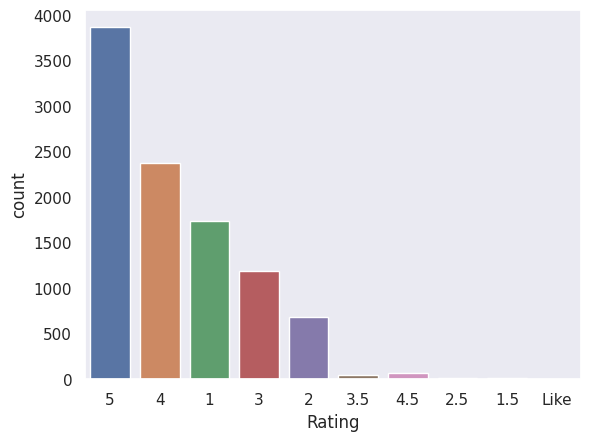

In [107]:
#Count the resturant Ratings
sns.set_theme(style="dark")
sns.color_palette("flare", as_cmap=True)

ax = sns.countplot(x="Rating",data=reviews_txt)


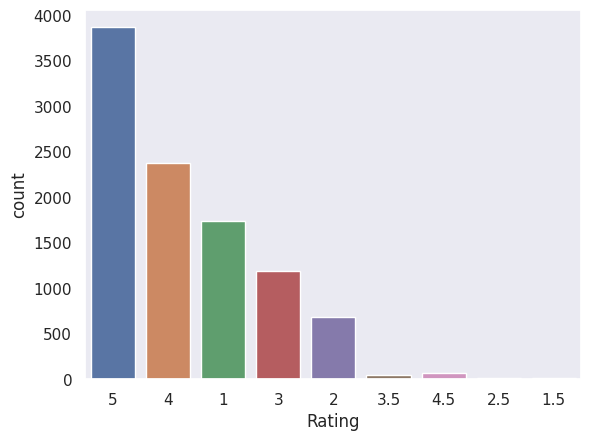

In [108]:
reviews_txt['Rating'] = reviews_txt['Rating'].str.replace('Like','5')
sns.countplot(data=reviews_txt,x='Rating')


In [109]:
reviews_txt['Rating'] = reviews_txt['Rating'].astype(float)
reviews_txt.head()


,Review,Rating
Restaurant,,
Beyond Flavours,"The ambience was good, food was quite good . h...",5.0
Beyond Flavours,Ambience is too good for a pleasant evening. S...,5.0
Beyond Flavours,A must try.. great food great ambience. Thnx f...,5.0
Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5.0
Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5.0


In [110]:
x = reviews_txt.groupby(['Restaurant','Rating'])['Rating'].count()
y = x.sort_values(ascending=False)


Text(0.5, 0, 'Restaurant_Name')

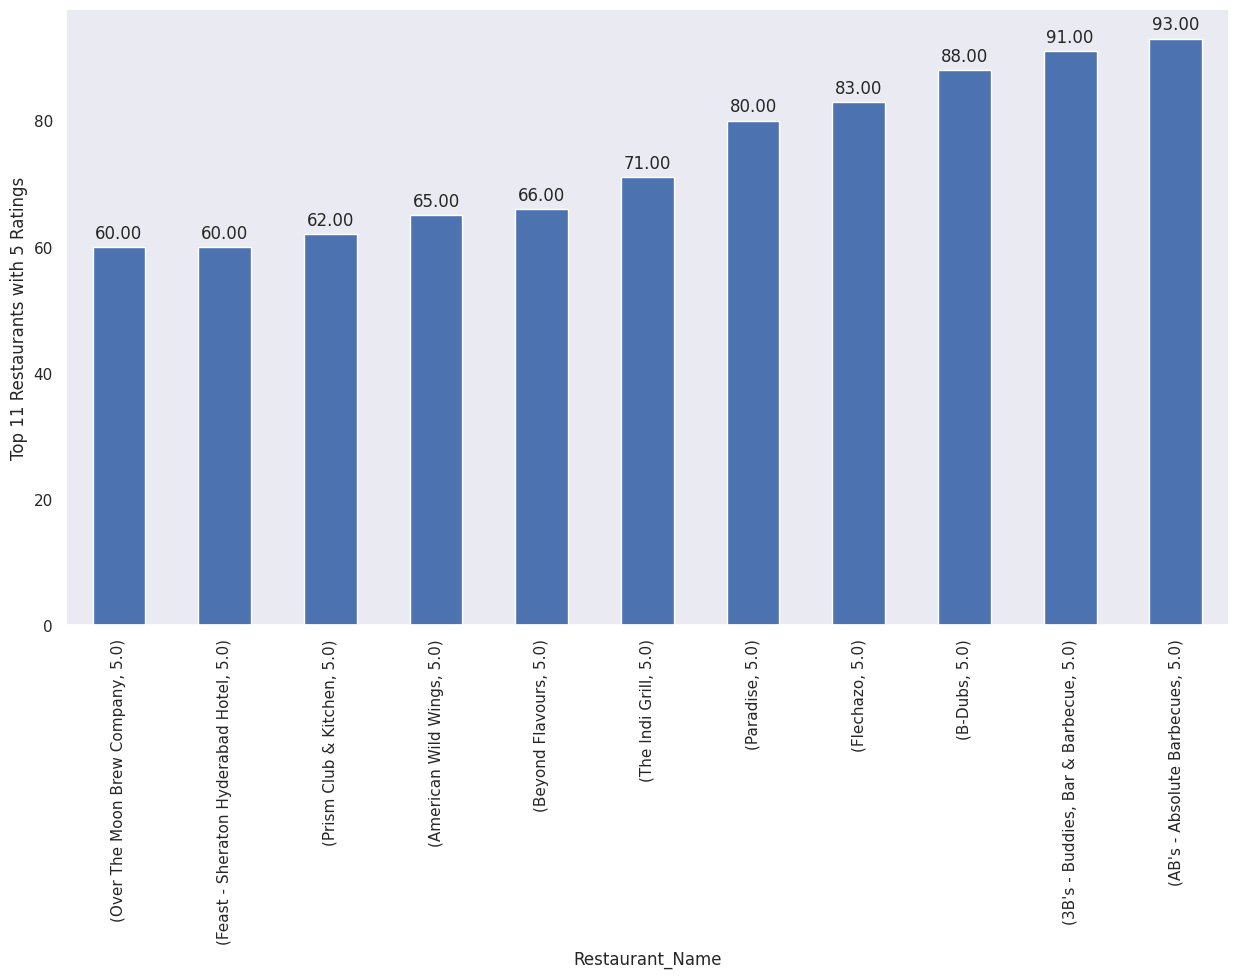

In [111]:

plt.figure(figsize=(15, 8))
res_rating_5 = reviews_txt.groupby(['Restaurant','Rating'])['Rating'].count()
res_having_5_Rating = res_rating_5.sort_values(ascending = False).head(11)
chart1 = res_having_5_Rating[::-1].plot.bar()
for p in chart1.patches:
    chart1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                                                   p.get_height()), ha = 'center', va = 'center', 
                   xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Top 11 Restaurants with 5 Ratings')
plt.xlabel('Restaurant_Name')

Text(0.5, 0, 'Restaurant_Name')

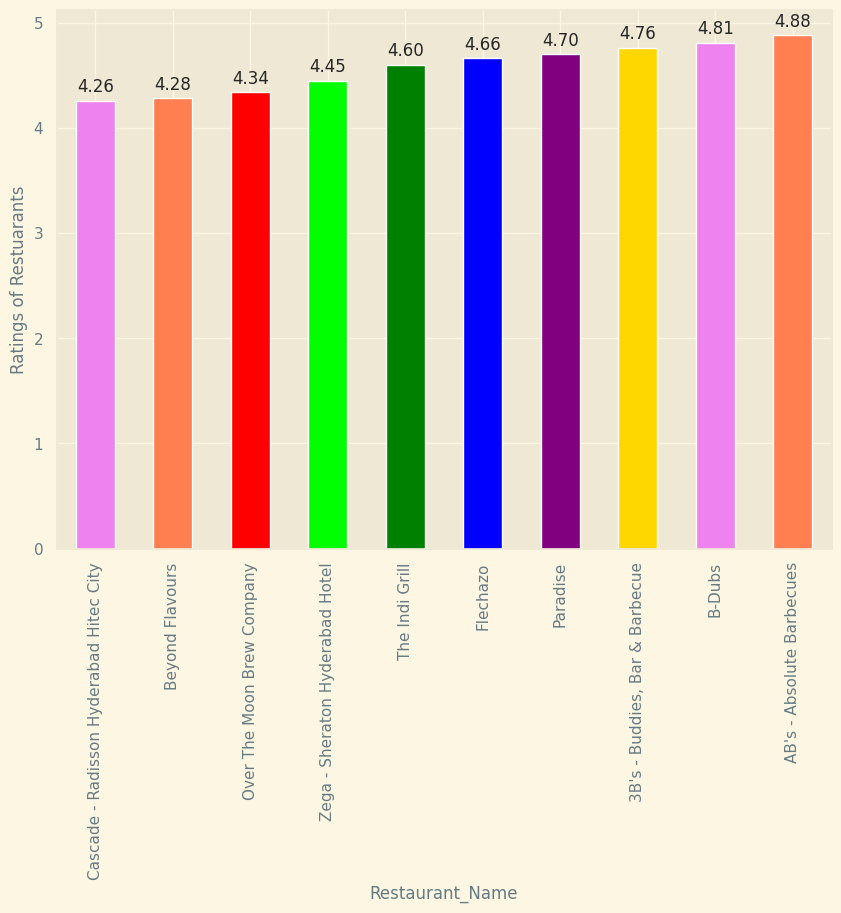

In [112]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(10,7))
top_10_res = reviews_txt.groupby('Restaurant')['Rating'].mean()
top_10_res_avgratings = top_10_res.sort_values(ascending=False).head(10)
chart = top_10_res_avgratings[::-1].plot.bar(color=['violet','coral', 'red','lime', 'green', 'blue', 'purple','gold'])
for p in chart.patches:
    chart.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                                                   p.get_height()), ha = 'center', va = 'center', 
                   xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Ratings of Restuarants')
plt.xlabel('Restaurant_Name')

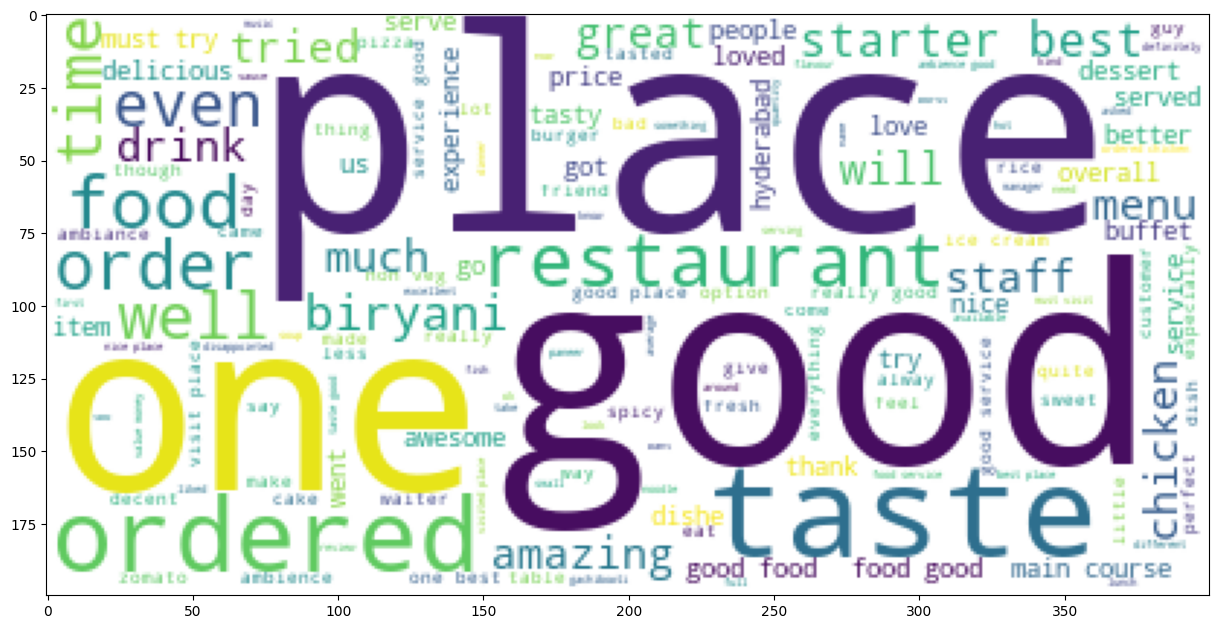

In [113]:
from wordcloud import WordCloud
plt.style.use('default')
plt.figure(figsize=(15, 15))
ip_string = ' '.join(reviews_txt['Review'].to_list())

wc = WordCloud(background_color='white').generate(ip_string.lower())
plt.imshow(wc)

In [114]:
rest['Time'] = pd.to_datetime(rest['Time'])
rest['Day'] = rest['Time'].dt.day
rest['Month'] = rest['Time'].dt.month
rest['Year'] = rest['Time'].dt.year

In [115]:
rest['reviews'] = rest['Metadata'].str.replace('[^0-9,]','').str.split(',').str[0].astype(float)
rest['followers'] = rest['Metadata'].str.replace('[^0-9,]','').str.split(',').str[1].astype(float)

In [116]:
rest['reviews'] = rest['reviews'].astype(float)
rest['followers'].fillna('0', inplace = True)
rest['followers'] = rest['followers'].astype(float)

In [117]:
rest.head(10)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Day,Month,Year,reviews,followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",2019-05-25 15:54:00,0,25,5,2019,1.0,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,25,5,2019,3.0,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,24,5,2019,2.0,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",2019-05-24 22:11:00,0,24,5,2019,1.0,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,24,5,2019,3.0,2.0
5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5,1 Review,2019-05-24 15:22:00,0,24,5,2019,1.0,0.0
6,Beyond Flavours,Jamuna Bhuwalka,"Its a very nice place, ambience is different, ...",5,1 Review,2019-05-24 01:02:00,0,24,5,2019,1.0,0.0
7,Beyond Flavours,Sandhya S,Well after reading so many reviews finally vis...,4,1 Review,2019-05-23 15:01:00,0,23,5,2019,1.0,0.0
8,Beyond Flavours,Akash Thorat,"Excellent food , specially if you like spicy f...",5,"1 Review , 1 Follower",2019-05-22 23:12:00,0,22,5,2019,1.0,1.0
9,Beyond Flavours,Smarak Patnaik,Came for the birthday treat of a close friend....,5,"1 Review , 1 Follower",2019-05-22 22:37:00,0,22,5,2019,1.0,1.0


In [118]:
p = rest.groupby(['Restaurant','followers','reviews'])['followers'].count()
q = p.sort_values(ascending=False)
print(q)

Restaurant                               followers  reviews
American Wild Wings                      0.0        1.0        46
Paradise                                 1.0        1.0        27
Green Bawarchi Restaurant                0.0        1.0        27
Hotel Zara Hi-Fi                         0.0        1.0        25
Arena Eleven                             0.0        1.0        25
                                                               ..
Pakwaan Grand                            9.0        2.0         1
                                         10.0       3.0         1
                                         13.0       3.0         1
                                         14.0       3.0         1
Komatose - Holiday Inn Express & Suites  10.0       10.0        1
Name: followers, Length: 7130, dtype: int64


Text(0.5, 0, 'Restaurant_Name')

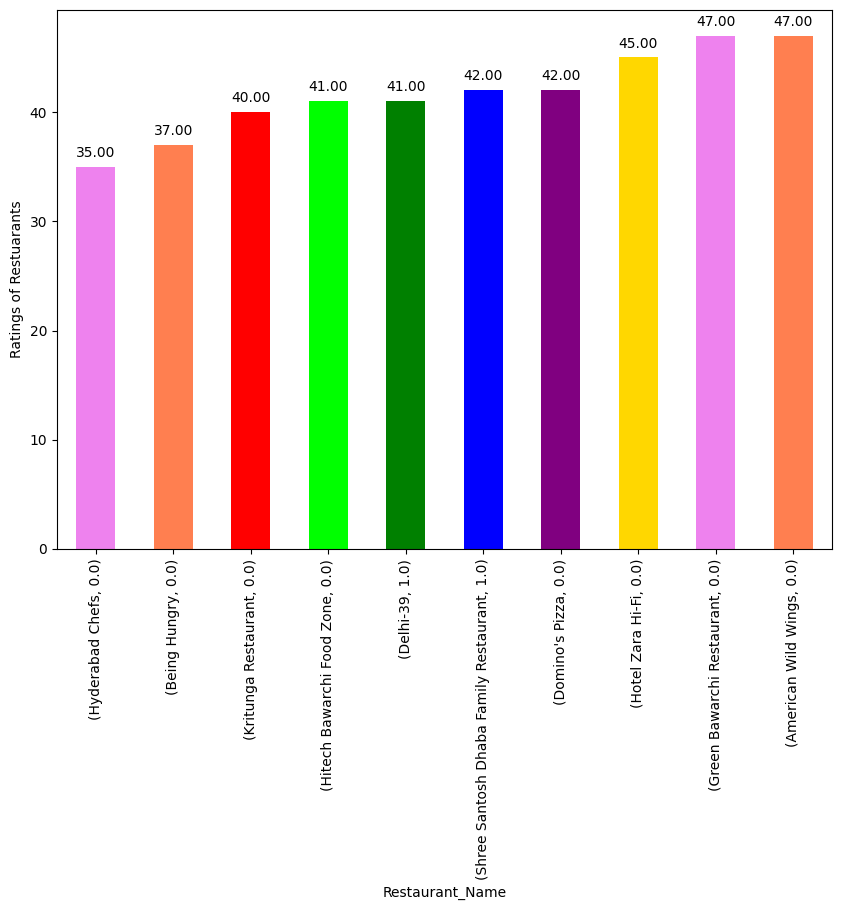

In [119]:
plt.style.use('default')
plt.figure(figsize=(10,7))
top_10_re = rest.groupby(['Restaurant','followers'])['followers'].count()


top_10_res_followers = top_10_re.sort_values(ascending=False).head(10)
chart = top_10_res_followers[::-1].plot.bar(color=['violet','coral', 'red','lime', 'green', 'blue', 'purple','gold'])
for p in chart.patches:
    chart.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                                                   p.get_height()), ha = 'center', va = 'center', 
                   xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Ratings of Restuarants')
plt.xlabel('Restaurant_Name')

In [120]:
import numpy as np
reviews_txt['Rating'] = np.where(reviews_txt['Rating'] <5, 0,1) #0 for BAD rating and 1 for Good rating

In [128]:
reviews_txt['Rating'] = reviews_txt['Rating'].astype(str) 

In [132]:
reviews_txt['Rating']=reviews_txt['Rating'].str.replace('1','positive')
reviews_txt['Rating']=reviews_txt['Rating'].str.replace('0','negative')

reviews_txt.head(20)
#data['Rating'] = data['Rating'].str.replace('Like','5')

,Review,Rating
Restaurant,,
Beyond Flavours,"The ambience was good, food was quite good . h...",positive
Beyond Flavours,Ambience is too good for a pleasant evening. S...,positive
Beyond Flavours,A must try.. great food great ambience. Thnx f...,positive
Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,positive
Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,positive
Beyond Flavours,"Ambiance is good, service is good, food is aPr...",positive
Beyond Flavours,"Its a very nice place, ambience is different, ...",positive
Beyond Flavours,Well after reading so many reviews finally vis...,negative
Beyond Flavours,"Excellent food , specially if you like spicy f...",positive


In [138]:
reviews_txt['Rating'].value_counts()
# 6129 rcustomers gave rating less than 5 and 3871 customerrs gave rating more than 5

negative    6129
positive    3871
Name: Rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


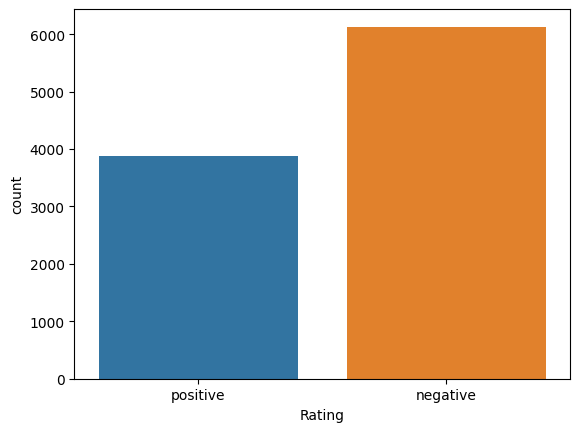

In [139]:
sns.countplot(reviews_txt['Rating']) #0 for bad and 1 for good

In [141]:
#Apply function on review column
reviews_txt['Review']=reviews_txt['Review'].apply(noiseremoval_text)

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


,Review,Rating
Restaurant,,
Beyond Flavours,"The ambience was good, food was quite good . h...",positive
Beyond Flavours,Ambience is too good for a pleasant evening. S...,positive
Beyond Flavours,A must try.. great food great ambience. Thnx f...,positive
Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,positive
Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,positive


In [143]:
#Stemming the text
def stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

In [144]:
#Apply function on review column
reviews_txt['Review']=reviews_txt['Review'].apply(stemmer)

In [145]:
reviews_txt.head()

,Review,Rating
Restaurant,,
Beyond Flavours,"the ambienc wa good, food wa quit good . had s...",positive
Beyond Flavours,ambienc is too good for a pleasant evening. se...,positive
Beyond Flavours,A must try.. great food great ambience. thnx f...,positive
Beyond Flavours,soumen da and arun wa a great guy. onli becaus...,positive
Beyond Flavours,food is good.w order kodi drumstick and basket...,positive


In [146]:
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
#set stopwords to english

stop_wr=set(stopwords.words('english'))
print(stop_wr)

{'from', "shouldn't", 'through', 'being', 'was', 'are', 'about', "don't", 't', 'having', 'during', "hadn't", 'any', 'few', 'below', "should've", 'her', 'will', 'then', 'have', "mightn't", "she's", 'those', 'you', 'own', 'couldn', 'up', 'o', 'if', 'so', "mustn't", 'wouldn', 'before', 'mustn', 'mightn', 'shan', 'our', 'does', 'the', 'hasn', "you're", 'no', 'm', 'do', 'your', 'under', 'now', 'weren', "needn't", 'itself', 'above', 've', 'me', 'these', 'by', 'in', "couldn't", 'his', 'am', 'when', 'had', 'my', 'because', 'after', 'than', 'with', 'their', 'needn', 'to', 'off', "wouldn't", 'down', 'at', 'can', "aren't", 'them', 'yours', 'she', "won't", 's', "haven't", 'its', 'just', 'nor', "that'll", 'he', 'd', 'has', 'ourselves', 'out', 'against', 'ain', "you've", 'they', 'over', 'but', "wasn't", 'yourself', 'been', 'yourselves', 'myself', "isn't", 'won', 'such', 'both', 'here', 'isn', 'once', 'this', 'each', 'of', 'there', 'until', 'ma', 'hers', 'did', 'themselves', 'a', 'what', 'very', 'whi

In [147]:
#removing the stopwords
def removing_stopwords(text, is_lower_case=False):
    #Tokenization of text
    tokenizers=ToktokTokenizer()
    #Setting English stopwords
    tokens = tokenizers.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filter_tokens = [token for token in tokens if token not in stop_wr]
    else:
        filter_tokens = [token for token in tokens if token.lower() not in stop_wr]
    filtered_text = ' '.join(filter_tokens)    
    return filtered_text

In [148]:
#Apply function on review column
reviews_txt['Review']=reviews_txt['Review'].apply(removing_stopwords)

In [149]:
reviews_txt.head(10)

,Review,Rating
Restaurant,,
Beyond Flavours,"ambienc wa good , food wa quit good . saturday...",positive
Beyond Flavours,ambienc good pleasant evening. servic veri pro...,positive
Beyond Flavours,must try .. great food great ambience. thnx se...,positive
Beyond Flavours,soumen da arun wa great guy. onli becaus behav...,positive
Beyond Flavours,food good.w order kodi drumstick basket mutton...,positive
Beyond Flavours,"ambianc good , servic good , food apradeecp su...",positive
Beyond Flavours,"veri nice place , ambienc different , food ord...",positive
Beyond Flavours,well read mani review final visit thi place .....,negative
Beyond Flavours,"excel food , special like spici food . courteo...",positive


In [150]:
reviews_txt.shape

(10000, 2)

In [157]:
#split the dataset  
#train dataset
train_reviews_data=reviews_txt.Review[:5000]

#test dataset

test_reviews_data=reviews_txt.Review[5000:]


In [158]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train=cv.fit_transform(train_reviews_data)
#transformed test reviews
cv_test=cv.transform(test_reviews_data)

print('BOW_cv_train:',cv_train.shape)
print('BOW_cv_test:',cv_test.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (5000, 197500)
BOW_cv_test: (5000, 197500)


In [159]:
#Tfidf vectorizer
tf=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tf_train=tf.fit_transform(train_reviews_data)
#transformed test reviews
tf_test=tf.transform(test_reviews_data)
print('Tfidf_train:',tf_train.shape)
print('Tfidf_test:',tf_test.shape)

Tfidf_train: (5000, 197500)
Tfidf_test: (5000, 197500)


In [160]:
#labeling the sentient data
label=LabelBinarizer()
#transformed sentiment data
sentiment_data=label.fit_transform(reviews_txt['Rating'])
print(sentiment_data.shape)

(10000, 1)


In [161]:
train_data=reviews_txt.Rating[:5000]
test_data=reviews_txt.Rating[5000:]


In [162]:
#training the model
logistic=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=logistic.fit(cv_train,train_data)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=logistic.fit(tf_train,train_data)
print(lr_tfidf)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [163]:
#Predicting the model for bag of words
lr_bow_predict=logistic.predict(cv_test)
print(lr_bow_predict)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


In [164]:
##Predicting the model for tfidf features
lr_tfidf_predict=logistic.predict(tf_test)
print(lr_tfidf_predict)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


In [165]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_data,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

lr_bow_score : 0.6258


In [166]:
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_data,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_tfidf_score : 0.6226
